In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'data_pepe.xlsx'
data = pd.read_excel(file_path)

# Chọn đặc trưng và nhãn
features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']
target_label = 'category'

In [3]:
X = data[features]
y = data[target_label]


In [4]:
# Xử lý giá trị thiếu (nếu có)
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna('Unknown')

In [5]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Khởi tạo và huấn luyện mô hình
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
# Dự đoán
y_pred = clf.predict(X_test)

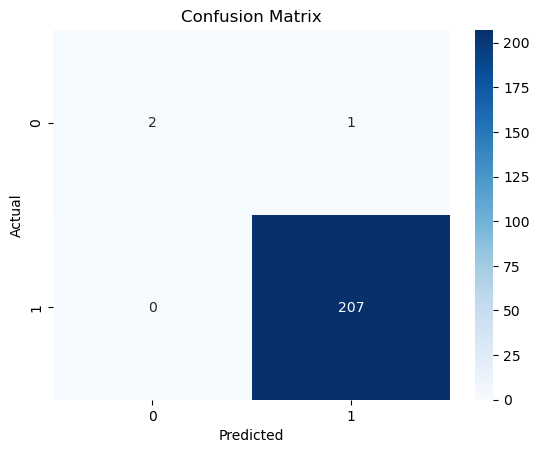

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# In báo cáo chi tiết
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        Normal       1.00      0.67      0.80         3
Reconnaissance       1.00      1.00      1.00       207

      accuracy                           1.00       210
     macro avg       1.00      0.83      0.90       210
  weighted avg       1.00      1.00      0.99       210



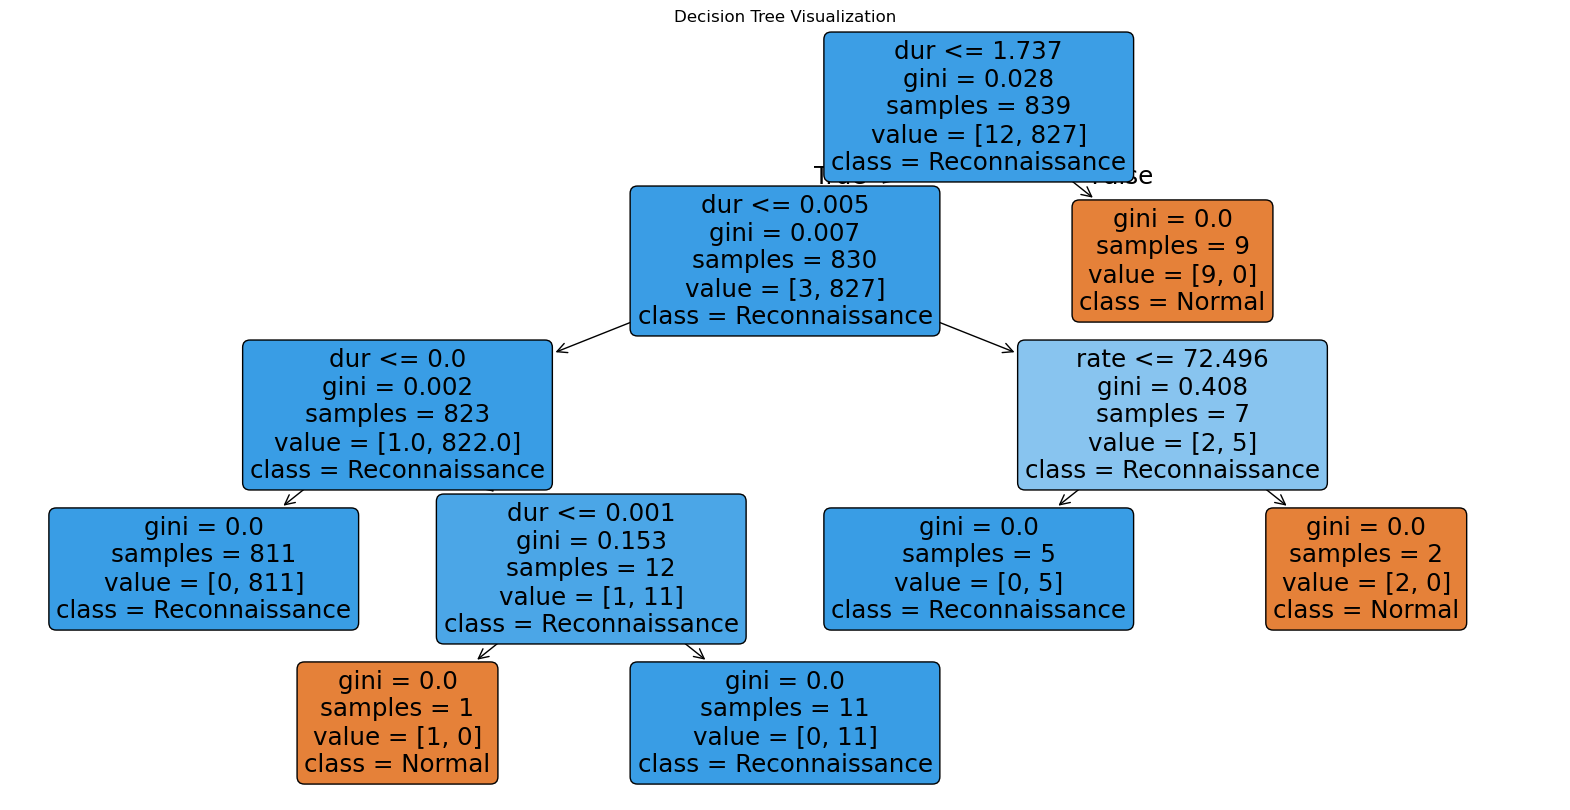

In [10]:
# Vẽ cây quyết định
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

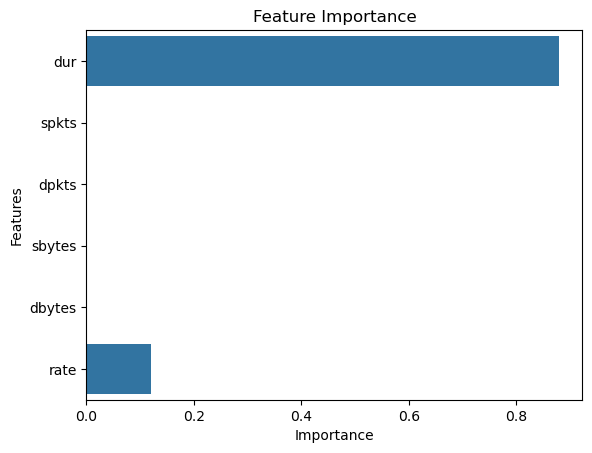

In [11]:
# Vẽ biểu đồ độ quan trọng của từng feature
importances = clf.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()